In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.utils import shuffle
FILE = loadmat('binaryalphadigs.mat')

In [64]:
class RBM:
    
    def __init__(self, p, q):
        self.a = np.zeros((1,p))
        self.b = np.zeros((1,q))
        self.w = 0.01 * np.random.rand(p,q)
        
    def entree_sortie(self, donnee):
        n = donnee.shape[0]
        sortie = 1 / (1 + np.exp(- self.b - donnee @ self.w ))
        return sortie

    def sortie_entree(self, donnee):
        n = donnee.shape[0]
        entree = 1 / (1 + np.exp(- self.a - donnee @ self.w.T))
        return entree
    
    def train(self, donnee, n_hidden, n_iteration, learning_rate, size_batch):   
        loss   = np.zeros(n_iteration)
        donnee = shuffle(donnee)
        n      = donnee.shape[0]
        q      = n_hidden
        p      = donnee.shape[1]
    
        for i in np.arange(0, n_iteration):
        
            for batch in np.arange(0, n, size_batch):
            
                index_batch = np.arange(batch, min(batch + size_batch,n))
                x = donnee[index_batch,:]
        
                # tirage monte carlo
                v_0   = x
                p_hv0 = self.entree_sortie(v_0)
                h_0   = (np.random.rand(v_0.shape[0], q) < p_hv0).astype('float')
                p_vh0 = self.sortie_entree(h_0)
                v_1   = (np.random.rand(v_0.shape[0], p) < p_vh0).astype('float')
                p_hv1 = self.entree_sortie(v_1)
            
                # calcul gradient
                d_a = np.sum(v_0 - v_1, axis=0) / v_0.shape[0]
                d_b = np.sum(p_hv0 - p_hv1, axis=0) / v_0.shape[0]
                d_W = (v_0.T @ p_hv0 - v_1.T @ p_hv1) / v_0.shape[0] # produit vectoriel

                # mise a jour
                self.a = self.a + learning_rate * d_a
                self.b = self.b + learning_rate * d_b
                self.w = self.w + learning_rate * d_W
            
            sortie = self.entree_sortie(donnee)
            entree_reconstruite = self.sortie_entree(sortie)
            loss[i] = np.sum((entree_reconstruite - donnee)**2)/(n*p)
        
        return RBM, loss

    def generer_image(self, n_image, n_iteration, labels):
    
        p = self.w.shape[0]
        q = self.w.shape[1]
        plt.figure(figsize=(20,10))
        for i in range(n_image):
            v = (np.random.rand(p) < 0.5).astype('float')
            for j in range(n_iteration):
                h = (np.random.rand(q) < self.entree_sortie(v)).astype('float')
                v = (np.random.rand(p) < self.sortie_entree(h)).astype('float')
        
            plt.subplot(int(n_image/5),5,i+1)
            plt.imshow(1-v.reshape(20,16),cmap='gray')
            plt.axis('off')
        plt.suptitle(labels, fontsize=15)
        plt.show()

In [3]:
def lire_alpha_digit(FILE_dat, idx):
     
    imgs = FILE_dat[idx,:].flatten()
    imgs_flatten = []
    for img in imgs:
        imgs_flatten.append(img.flatten())
    
    return np.array(imgs_flatten)

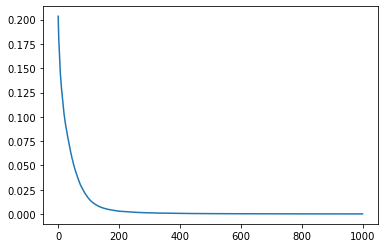

In [69]:
index         = [10,11,12]
donnee        = lire_alpha_digit(FILE['dat'], index)
n_hidden      = 200
n_iteration   = 1000
learning_rate = 0.1
size_batch    = 10
RBM           = RBM(donnee.shape[1], n_hidden)
RBM, loss     = RBM.train(donnee, n_hidden, n_iteration, learning_rate, size_batch)

plt.plot(loss)
plt.show()

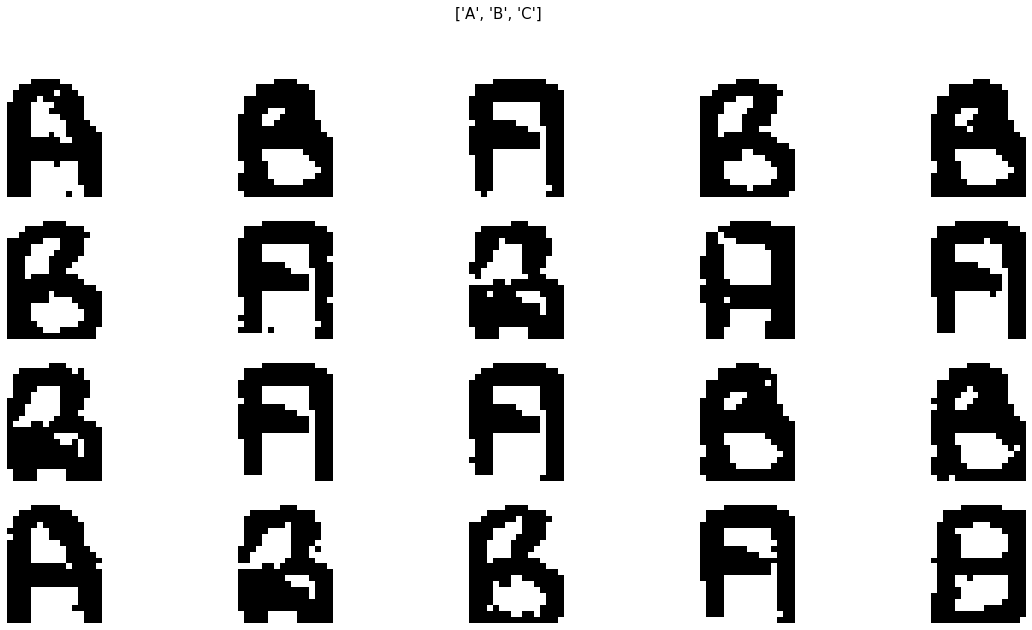

In [76]:
n_iteration = 1000
n_image     = 20
labels      = [char[0] for char in FILE['classlabels'][0,index]]
RBM.generer_image(n_image, n_iteration, labels)